In [137]:
#importing necessary deatils
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

import warnings
warnings.filterwarnings('ignore')

.Here all the features and label are continous .so, LinearRegression is used in making model.                 

In [138]:
#read csv file and converting it into DataAFrame
data=pd.read_csv('baseball.csv')
data

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [139]:
#understand data by checking stats of dataset
data.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


.Their is no null value in all the features as, all the features have same count i.e 30.          
.diffrence between the mean and std is good but it looks some doubt in 'SHO' features .                                
.There may be some null value nd skewness in  features i.e R,AB,H,2B,3B etc.                              
Let's see count of null values / duplicate values by diffrent way.                              

In [140]:
#to see the not_null count for all the column
data.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

.Here, we saw that all the features have value 0 .Hence,There is no null value in given features.                           

In [141]:
#to print summary
print('shape--------->',data.shape)
print('Each column and datatype and its count','\n')
print(data.info())

shape---------> (30, 17)
Each column and datatype and its count 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB
None


.their are total 30 rows and 17 column in which 16 are features nd 1(W) is label.                           

In [142]:
#To check wheather the feature is imbalance or not.
data.W.value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

.Label Data looks linear. so ,dataset is not imbalanced.                      

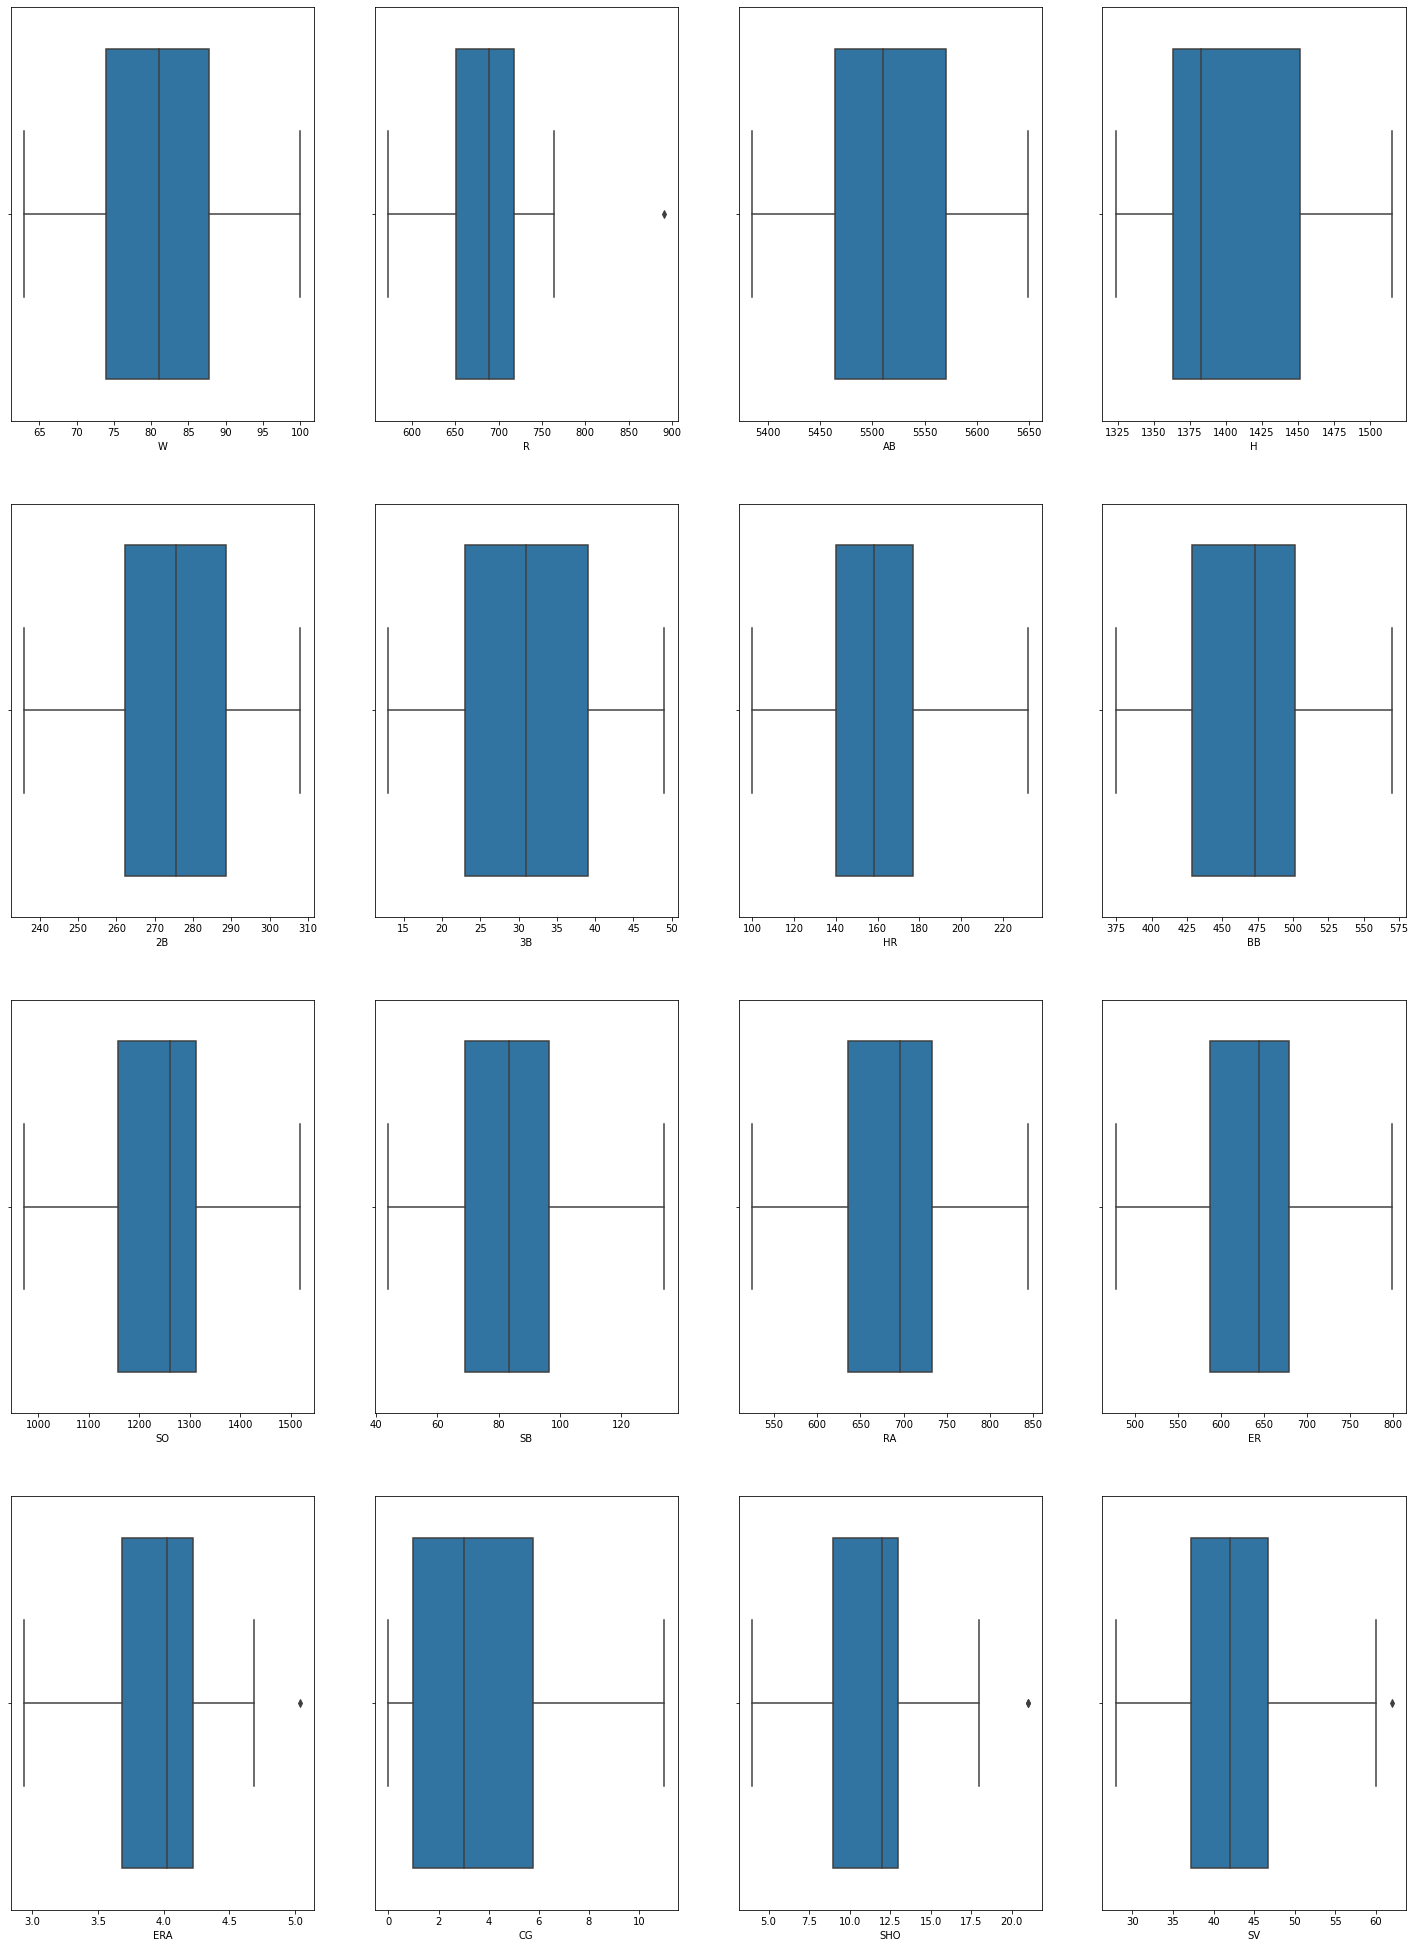

In [143]:
#Detecting Outliers using Boxplot and IQR
plt.figure(figsize=(25,35))
graph=1
for column in data:
    if graph<=16:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

.We can see the higher side  outliers is present in R,ERA,SHO,SV.so, To remove them we use Outliers formula by finding IQR.       

In [144]:
#Finding the IQR(inter quantile range) to identify outliers

#1st quantile
q1=data.quantile(0.25)

#3rd quantile
q3=data.quantile(0.75)

#IQR
iqr=q3-q1

In [145]:
#Higher side Outliers Removal for R
index=np.where(data['R'] > (q3.R+(1.5*iqr.R)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [146]:
#Higher side Outliers Removal for ERA
index=np.where(data['ERA'] > (q3.ERA + (1.5*iqr.ERA)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [147]:
#Higher side Outliers Removal for SHO
index=np.where(data['SHO'] > (q3.SHO + (1.5*iqr.SHO)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


In [148]:
#Higher side Outliers Removal for SV
index=np.where(data['SV'] > (q3.SV +(1.5*iqr.SV)))
data=data.drop(data.index[index])
data.reset_index(drop=True)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
6,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
7,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
8,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
9,88,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


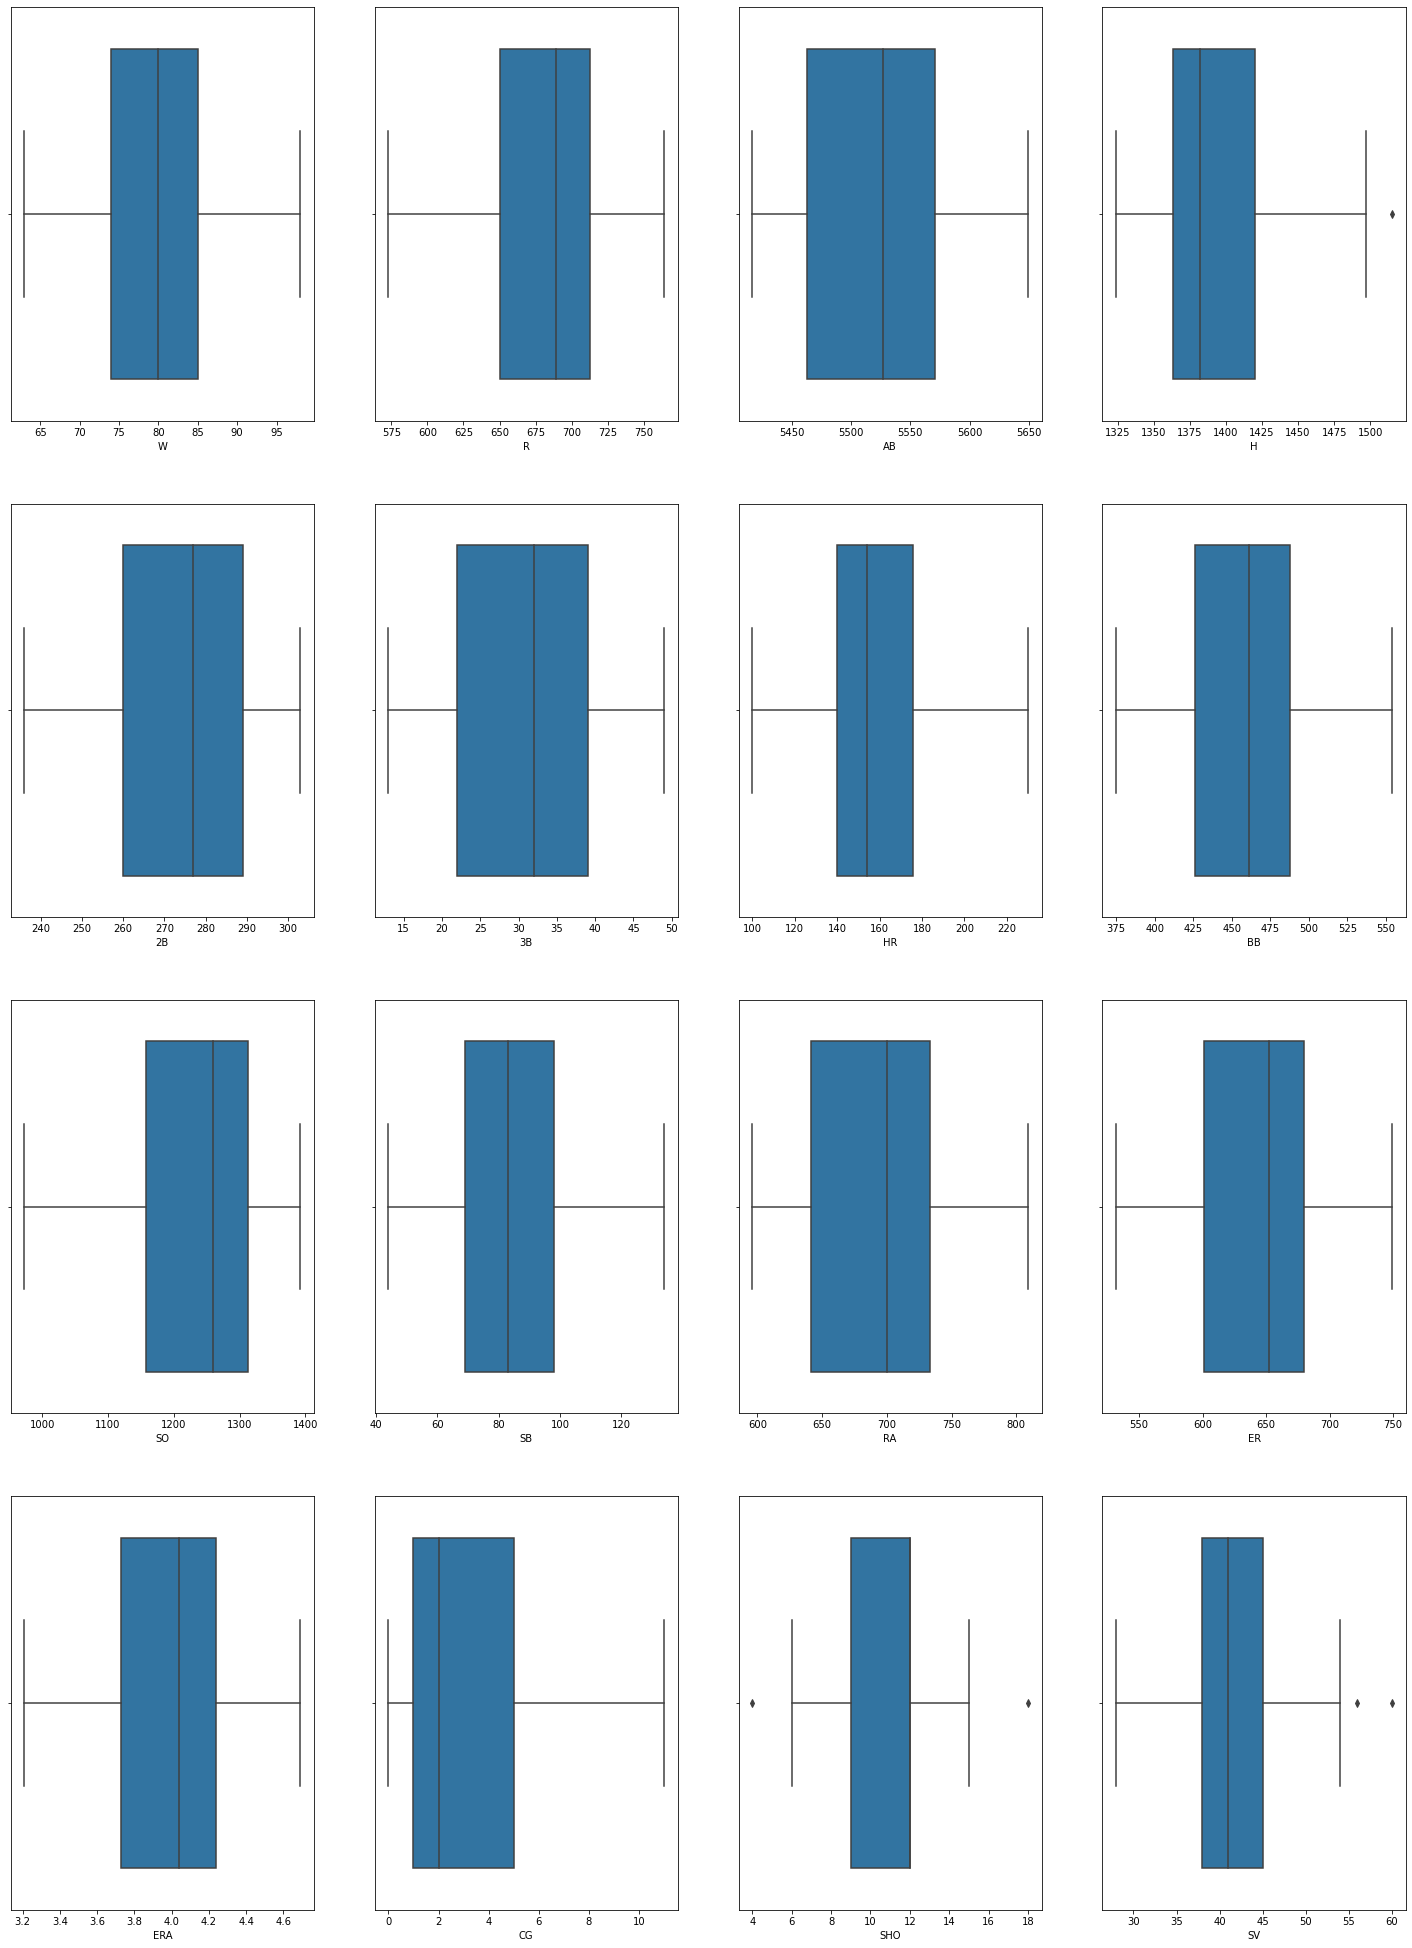

In [149]:
#Rechecking that wheather the outliers are present or not.
plt.figure(figsize=(25,35))
graph=1
for column in data:
    if graph<=16:
        ax=plt.subplot(4,4,graph)
        sns.boxplot(data[column],orient='v')
        plt.xlabel(column,fontsize=10)
    graph+=1
plt.show()

.There are still some outliers in H, SHO and SV . let's proceed we will deal with this later.                                                              

In [150]:
#Divide dataset into features and label                       
y=data['W']
x=data.drop(columns=['W'])

In [151]:
y

0     95
1     83
2     81
3     76
4     74
6     87
7     81
8     80
9     78
10    88
11    86
12    85
13    76
14    68
16    98
18    68
19    64
20    90
21    83
22    71
23    67
24    63
26    84
27    79
28    74
Name: W, dtype: int64

In [152]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,680,4.24,5,9,45,119


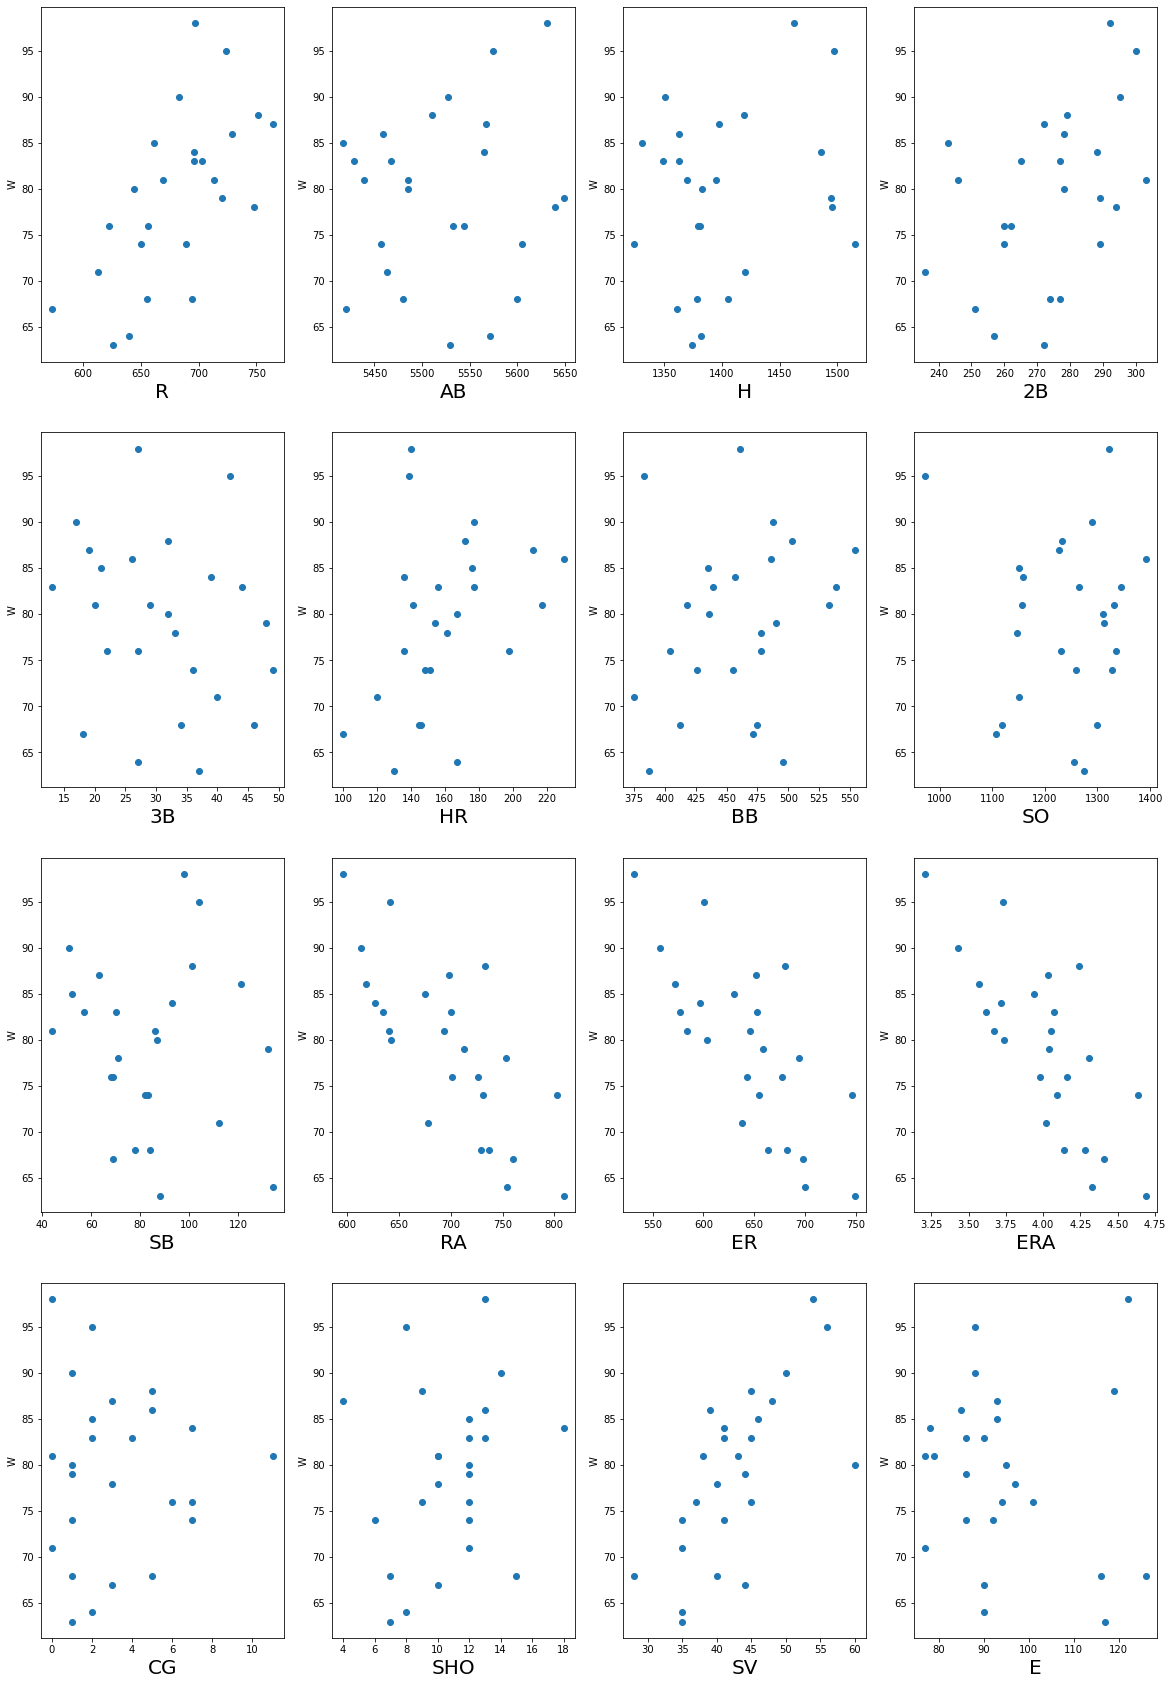

In [153]:
#visualizing relationship
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1
for column in x:
    if plotnumber <=16:
        ax=plt.subplot(4,4,plotnumber)
        plt.scatter(x[column],y)
        plt.xlabel(column,fontsize=20)
        plt.ylabel('W')
    plotnumber+=1
plt.show()    

The Relationship between dependent and independent variables look fairly linear. Thus ,our linearity assumption is satisfied.  

In [154]:
#Data Scaling
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)

In [155]:
#How does x_scaled data looks like:
x_scaled

array([[ 0.94127726,  0.76308406,  1.70999954,  1.47990334,  1.07504003,
        -0.69427551, -1.61775671, -2.79461668,  0.85185011, -0.95899259,
        -0.78311999, -0.7832949 , -0.43759497, -0.90258418,  1.88751117,
        -0.46885218],
       [ 0.33344139, -0.78836697, -0.98119497,  0.19642759,  1.27265769,
        -0.12792793, -0.42822972,  0.26541287, -0.58765803,  0.06601761,
         0.17280112,  0.18726001, -0.43759497,  0.4247455 ,  0.3380617 ,
        -0.6109286 ],
       [-0.25268605, -1.19059502, -0.14474262,  1.64731322, -0.20947471,
        -0.62764639,  1.56847631, -0.85975263,  0.08975757, -0.97636564,
        -1.09563266, -0.9545693 ,  2.84436733, -0.23891934, -0.6479516 ,
        -1.10819606],
       [-1.27298198,  0.159742  , -0.39931508, -0.75222839, -0.40709237,
        -0.79421921, -1.17168409, -0.08160079, -0.67233498,  0.08339066,
        -0.01102986, -0.06965159,  1.38571742, -0.57075176, -0.78881064,
         0.45464454],
       [ 0.18148242,  1.19404268,  2

Let's go ahead and use linear regression &see how good it fits our data.But first,let's split our data in train & test.         

In [236]:
#spliting data into train test
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.27,random_state=200)

In [237]:
y_train.head()

6     87
23    67
14    68
28    74
3     76
Name: W, dtype: int64

In [238]:
#Model Instantiating & Trainning
regression=LinearRegression()
regression.fit(x_train,y_train)

LinearRegression()

In [239]:
#Predict the output(label)
data.tail(2)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92


In [240]:
print('W: ',regression.predict(scaler.transform([[650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92]])))

W:  [74.31617376]


In [243]:
#saving model
filename='finalized_model.pickle'
pickle.dump(regression,open(filename,'wb'))

In [244]:
#In order to get amount of trust/Evaluate the model that how much the given data fit to the model  using Adjusted R2 score.  
#Adjusted R2 score
regression.score(x_train,y_train)

0.9783821358112688

.Model fits 97 % of the given data.                             

In [242]:
#Let's check how well model fits the test data
regression.score(x_test,y_test)

0.39116908104156156

In [164]:
#Model Evaluation
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [165]:
y_pred=regression.predict(x_test)

In [166]:
mean_absolute_error(y_test,y_pred)

4.972983755634443

In [167]:
mean_squared_error(y_test,y_pred)

31.08765222926557

In [168]:
np.sqrt(mean_squared_error(y_test,y_pred))

5.575630209157129

In [169]:
#Using Regularization
#Lassocv
from sklearn.linear_model import Ridge,Lasso,RidgeCV,LassoCV
lasscv=LassoCV(alphas=None,max_iter=1000,normalize=True)
lasscv.fit(x_train,y_train)

LassoCV(normalize=True)

In [170]:
#best alpha parameter
alpha=lasscv.alpha_
alpha

0.33057564800881223

In [171]:
#now using Lasso regression and see how well our data has fitted before
lasso_reg=Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.33057564800881223)

In [172]:
lasso_reg.score(x_test,y_test)

0.8928365504147139

In [173]:
#Using Ridge regression model
ridgecv=RidgeCV(alphas=np.arange(0.001,0.1,0.001),normalize=True)
ridgecv.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.002, 0.003, 0.004, 0.005, 0.006, 0.007, 0.008, 0.009,
       0.01 , 0.011, 0.012, 0.013, 0.014, 0.015, 0.016, 0.017, 0.018,
       0.019, 0.02 , 0.021, 0.022, 0.023, 0.024, 0.025, 0.026, 0.027,
       0.028, 0.029, 0.03 , 0.031, 0.032, 0.033, 0.034, 0.035, 0.036,
       0.037, 0.038, 0.039, 0.04 , 0.041, 0.042, 0.043, 0.044, 0.045,
       0.046, 0.047, 0.048, 0.049, 0.05 , 0.051, 0.052, 0.053, 0.054,
       0.055, 0.056, 0.057, 0.058, 0.059, 0.06 , 0.061, 0.062, 0.063,
       0.064, 0.065, 0.066, 0.067, 0.068, 0.069, 0.07 , 0.071, 0.072,
       0.073, 0.074, 0.075, 0.076, 0.077, 0.078, 0.079, 0.08 , 0.081,
       0.082, 0.083, 0.084, 0.085, 0.086, 0.087, 0.088, 0.089, 0.09 ,
       0.091, 0.092, 0.093, 0.094, 0.095, 0.096, 0.097, 0.098, 0.099]),
        normalize=True)

In [174]:
ridgecv.alpha_

0.099

In [175]:
ridge_model=Ridge(alpha=ridgecv.alpha_)
ridge_model.fit(x_train,y_train)

Ridge(alpha=0.099)

In [176]:
ridge_model.score(x_test,y_test)

0.4404609376430698

We get diffrent diffrent r2 score .so, we can say that this model is overfitted.                              

.We get model overfitted .so, going to use DT model to get better accuracy.                          

In [177]:
#Importing Decision tree algorithm
from sklearn.tree import DecisionTreeClassifier

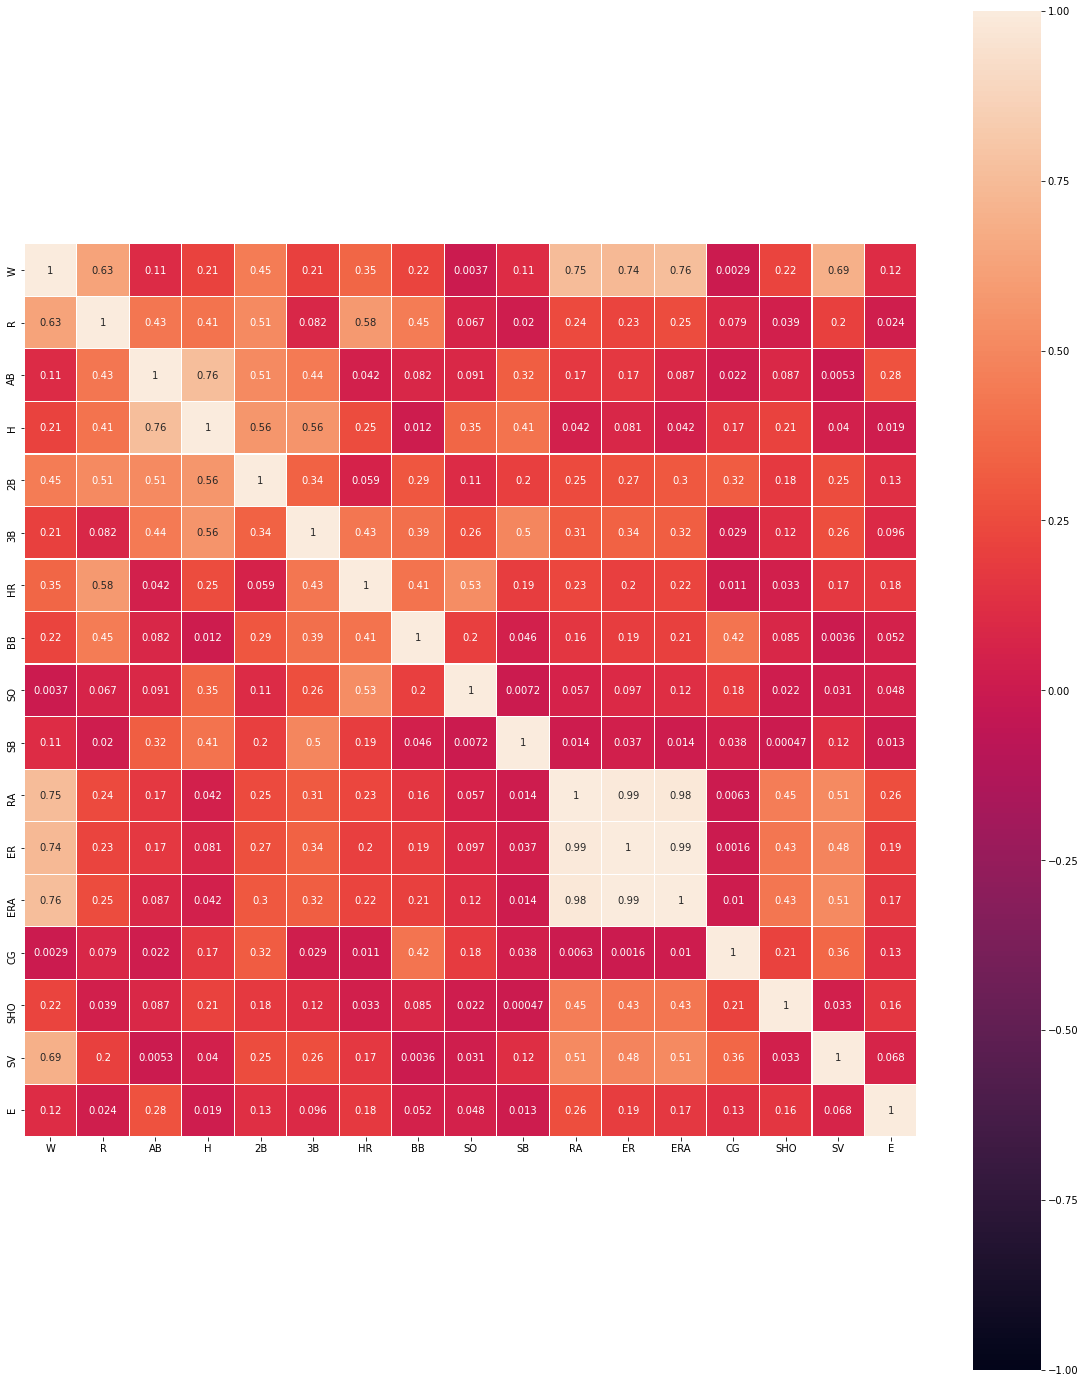

In [178]:
#ploting Heatmap(correlation matrix)  to see if we can reduce the features using diffrent techniques.
data_corr=data.corr().abs()

plt.figure(figsize=(20,25))
sns.heatmap(data_corr,vmin=-1,vmax=1,annot=True,square=True,fmt='.2g',linewidths=.1,)
plt.show()

.Now by using heatmap ,we got that their is a multicolinearity exists between the column ER,R and ERA.                

In [179]:
#let's check the relationship between ER , R AND ERA  with the label
df1=data[['ER','R','ERA']]
df1

,ER,R,ERA
0,601,724,3.73
1,653,696,4.07
2,584,669,3.67
3,643,622,3.98
4,746,689,4.64
6,652,764,4.03
7,646,713,4.05
8,604,644,3.74
9,694,748,4.31
10,680,751,4.24


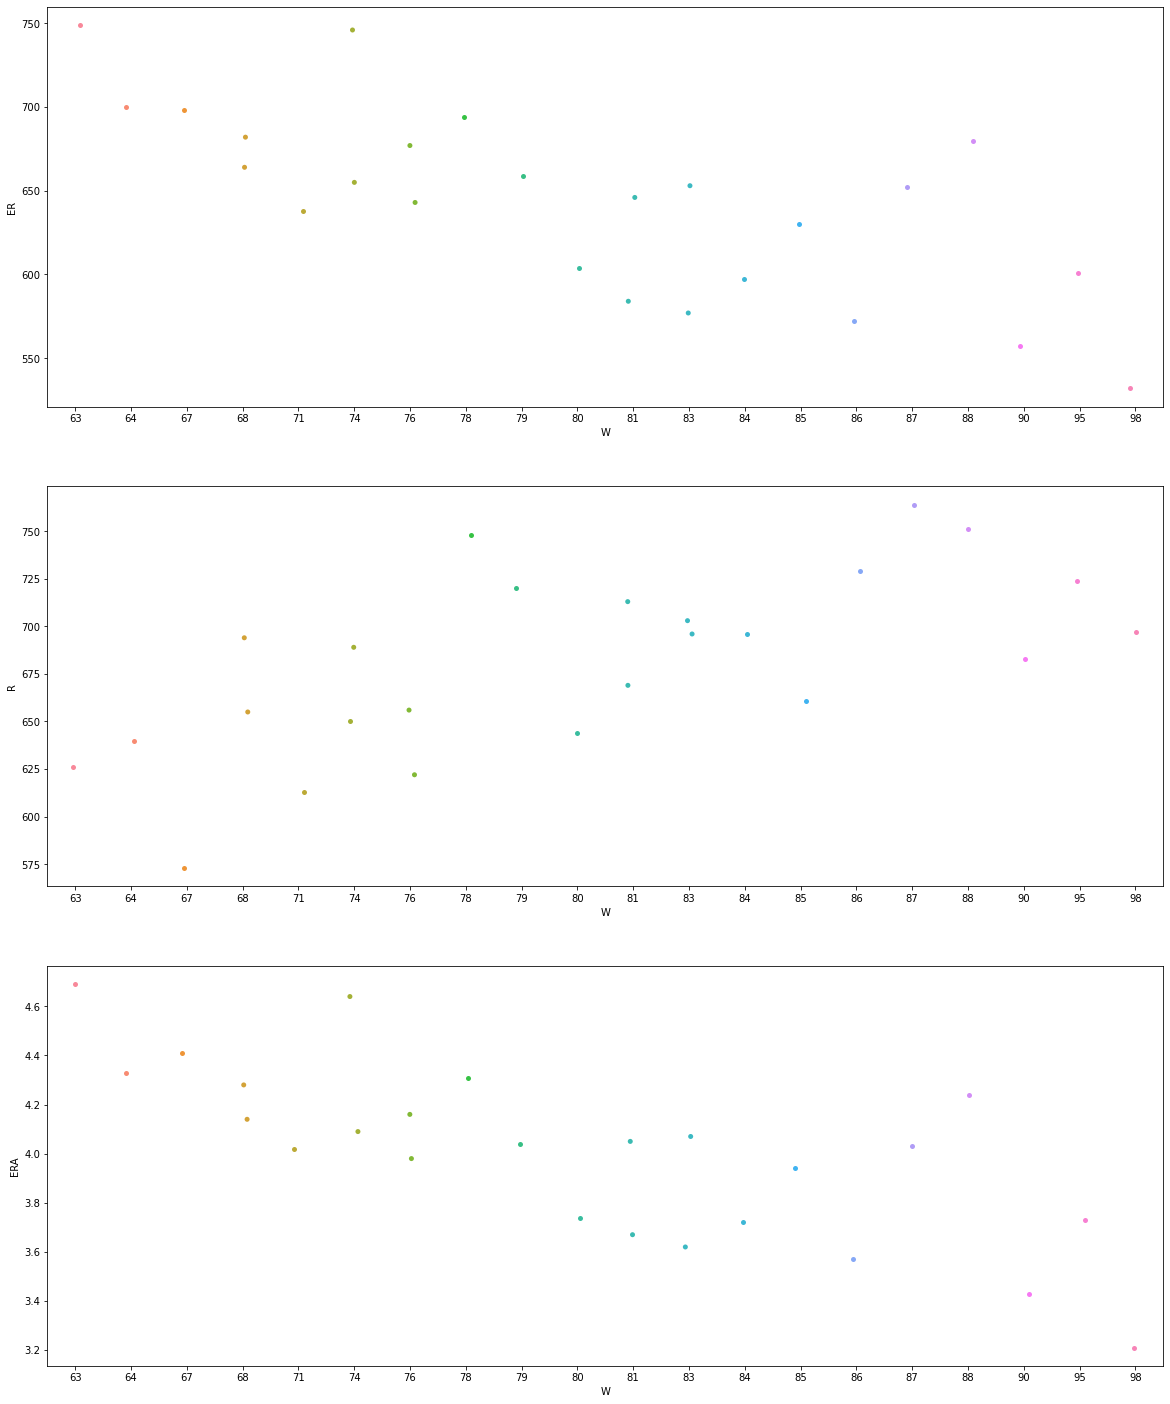

In [180]:
#lets see the relationship between the given column nd label; to remove the multicolinearity.                  
plt.figure(figsize=(20,25),facecolor='white')
plotnumber=1
for column in df1:
    if plotnumber<=3:
        ax=plt.subplot(3,1,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
plt.show()    

.From here ,we can see that R looks like a strong relationship with label. so, we can remove ER,ERA.                   

In [181]:
#Data scaling
x=data.drop(columns=['W','ER','ERA'])
y=data['W']

In [182]:
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,CG,SHO,SV,E
0,724,5575,1497,300,42,139,383,973,104,641,2,8,56,88
1,696,5467,1349,277,44,156,439,1264,70,700,2,12,45,86
2,669,5439,1395,303,29,141,533,1157,86,640,11,10,38,79
3,622,5533,1381,260,27,136,404,1231,68,701,7,9,37,101
4,689,5605,1515,289,49,151,455,1259,83,803,7,12,35,86
6,764,5567,1397,272,19,212,554,1227,63,698,3,4,48,93
7,713,5485,1370,246,20,217,418,1331,44,693,0,10,43,77
8,644,5485,1383,278,32,167,436,1310,87,642,1,12,60,95
9,748,5640,1495,294,33,161,478,1148,71,753,3,10,40,97
10,751,5511,1419,279,32,172,503,1233,101,733,5,9,45,119


In [183]:
#splitting the dataset
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=330)

In [184]:
#visualizing the tree 
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier()

In [185]:
clf.score(x_train,y_train)

1.0

In [186]:
y_pred=clf.predict(x_test)

In [187]:
#accuracy
clf.score(x_test,y_test)

0.0

In [193]:
#Using Hyperparameter tunning
grid_param={
    'criterion':['RSS'],
    'max_depth':range(2,10,3),
    'min_samples_leaf':range(1,10,2),
    'min_samples_split':range(2,10,2)
}

In [189]:
grid_search=GridSearchCV(estimator=clf,param_grid=grid_param,cv=5,n_jobs=-1)

In [190]:
grid_search.fit(x_train,y_train)

ValueError: n_splits=5 cannot be greater than the number of members in each class.